In [1]:
# import libraries
%matplotlib widget
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull 
from scipy import ndimage

# import our created function to read files
from Data_functions import getData

In [4]:
def makePlot(path):
    
    title = path.split('/')
    title = title[-1][:-4]
    
    points, vectors = getData(path) # read the file to get points and vectors with our read function
    faces = np.array([points['x'][vectors['x'][:]-1], points['y'][vectors['y'][:]-1], points['z'][vectors['z'][:]-1]]) # find faces through vector calculation
    df = pd.DataFrame(faces) # put faces in a dataframe for plotting
    
    # relate coordinates to the dataframe coresponding components
    x_coords = df.loc[0].values
    y_coords = df.loc[1].values
    z_coords = df.loc[2].values

    points = np.column_stack((x_coords, y_coords, z_coords))
    hull = ConvexHull(points)

# create figure
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(x_coords, y_coords, z_coords, triangles=hull.simplices, cmap='viridis', alpha=0.6)

# calculate center of mass from each coordinates and plot it
    center = sum(x_coords)/len(x_coords), sum(y_coords)/len(y_coords), sum(z_coords)/len(z_coords)
    plt.plot(center[0], center[1], marker='o', color='black')
    
    # displaying the title and axes titles
    plt.title(title)
    plt.xlabel('x') 
    plt.ylabel('y') 
    
    return plt.show()


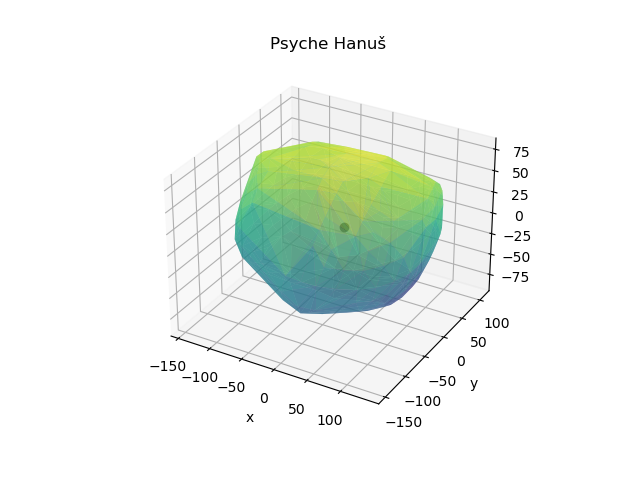

In [5]:
makePlot('../data/obj/Psyche Hanuš.obj')

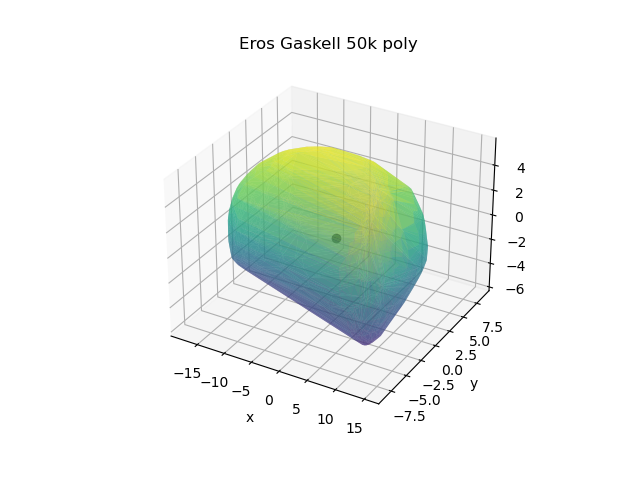

In [6]:
makePlot('../data/obj/Eros Gaskell 50k poly.obj')